In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv( "Position_Salaries.csv" )
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

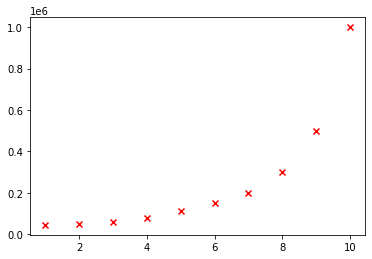

In [6]:
plt.scatter( x, y, color = "red", marker = 'x' )
plt.show( )

In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression( )
linear_model.fit( x, y )

LinearRegression()

In [8]:
linear_model.score( x, y )

0.6690412331929895

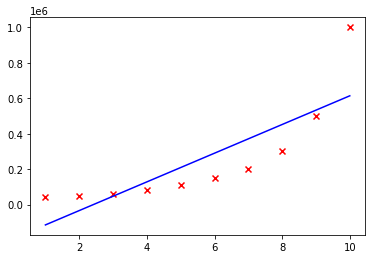

In [9]:
plt.scatter( x, y, color = "red", marker = 'x' )
plt.plot( x, linear_model.predict( x ), color = "blue" )
plt.show( )

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures( degree = 2 )
x_poly = poly_reg.fit_transform( x ) # matrix of features composed of x0, x1, and x1^2
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [11]:
polynomial_model = LinearRegression( )
polynomial_model.fit( x_poly, y )

LinearRegression()

In [12]:
polynomial_model.score( x_poly, y )

0.9162082221443943

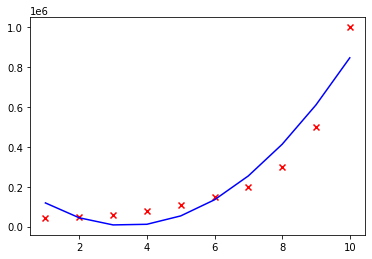

In [13]:
plt.scatter( x, y, color = "red", marker = 'x' )
plt.plot( x, polynomial_model.predict( x_poly ), color = "blue" )
plt.show( )

In [14]:
poly_reg_4 = PolynomialFeatures( degree = 4 )
x_poly_4 = poly_reg_4.fit_transform( x )

polynomial_model_4 = LinearRegression( )
polynomial_model_4.fit( x_poly_4, y )

LinearRegression()

In [15]:
x_poly_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [16]:
polynomial_model_4.score( x_poly_4, y )

0.9973922891706614

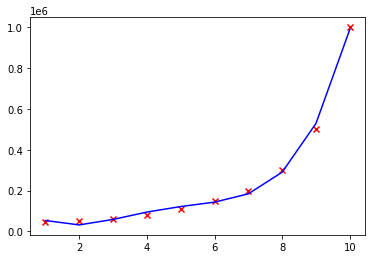

In [17]:
plt.scatter( x, y, color = "red", marker = 'x' )
plt.plot( x, polynomial_model_4.predict( x_poly_4 ), color = "blue" )
plt.show( )

### The best model is a polynomial of degree 3.

In [18]:
linear_model.predict( [[6.5]] )

array([330378.78787879])

In [19]:
polynomial_model.predict( [[1, 6.5, pow( 6.5, 2 )]] )

array([189498.10606061])

In [20]:
polynomial_model_4.predict( poly_reg_4.fit_transform( [[6.5]] ) )

array([158862.45265153])